In [1]:
!pip install scikit-opt
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sko.PSO import PSO
from tqdm import tqdm
import pandas as pd

# **Generated TSP Points and Distance Matrix**

In [2]:
n = 40

points = np.random.rand(n, 2)

distance_matrix = cdist(points, points)

In [3]:

def tsp_distance(x):
    """
    Converts a continuous position vector to a TSP tour using argsort,
    then computes the total distance of the tour.
    """
    perm = np.argsort(x)
    return sum([
        distance_matrix[perm[i % n], perm[(i + 1) % n]]
        for i in range(n)
    ])


In [4]:
w = 0.8
c1 = 0.1
c2 = 0.1


pso = PSO(
    func=tsp_distance,
    n_dim=n,
    pop=200,
    max_iter=800,
    lb=[0] * n,
    ub=[1] * n,
    w=w,
    c1=c1,
    c2=c2
)


best_x, best_y = pso.run()
print("Best Distance:", best_y)

best_tour = np.argsort(best_x)


Best Distance: [10.69746169]


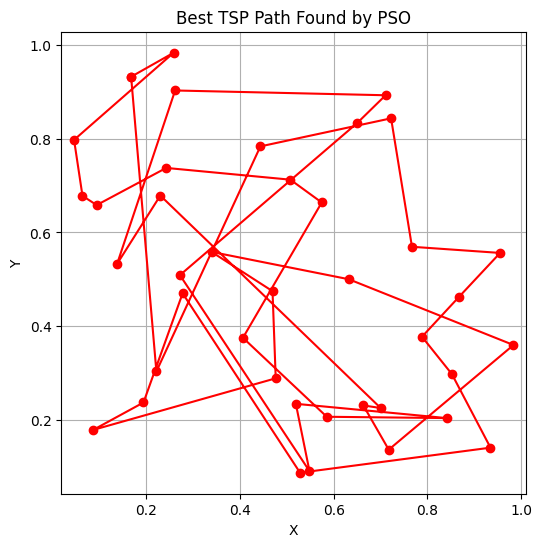

In [5]:
plt.figure(figsize=(6, 6))
tour_coords = points[np.append(best_tour, best_tour[0])]
plt.plot(tour_coords[:, 0], tour_coords[:, 1], 'o-r')
plt.title("Best TSP Path Found by PSO")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.grid()
plt.show()


# **Plotting the Convergence Curve for the PSO**

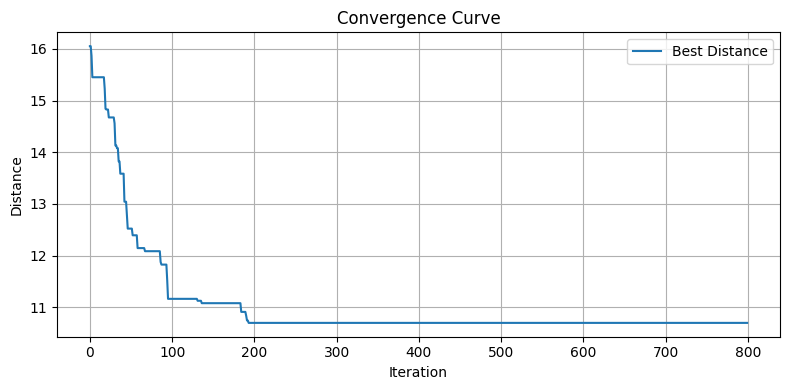

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(pso.gbest_y_hist, label='Best Distance')
plt.title("Convergence Curve")
plt.xlabel("Iteration")
plt.ylabel("Distance")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


100%|██████████| 4/4 [00:23<00:00,  5.93s/it]


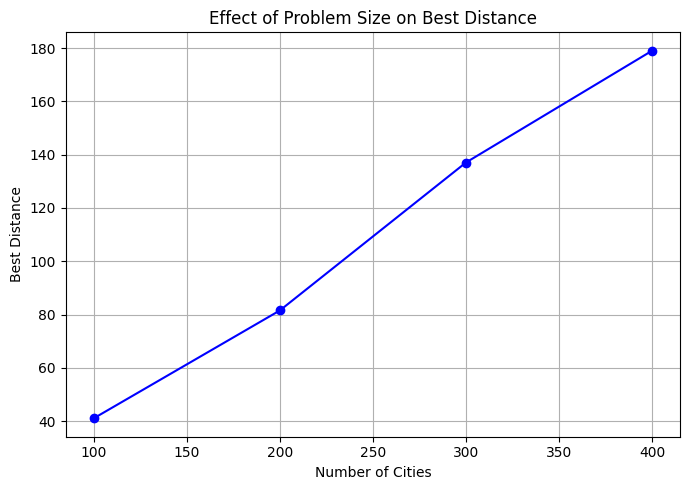

In [7]:
sizes = [100, 200, 300, 400]
results = []

for n_test in tqdm(sizes):
    points_test = np.random.rand(n_test, 2)
    dist_mat = cdist(points_test, points_test)

    def dist_fn(x):
        perm = np.argsort(x)
        return sum([dist_mat[perm[i % n_test], perm[(i + 1) % n_test]] for i in range(n_test)])

    pso = PSO(func=dist_fn, n_dim=n_test, pop=100, max_iter=300, lb=[0]*n_test, ub=[1]*n_test, w=0.8, c1=0.1, c2=0.1)
    _, best_dist = pso.run()
    results.append(best_dist)


plt.figure(figsize=(7, 5))
plt.plot(sizes, results, 'o-b')
plt.title("Effect of Problem Size on Best Distance")
plt.xlabel("Number of Cities")
plt.ylabel("Best Distance")
plt.grid()
plt.tight_layout()
plt.show()

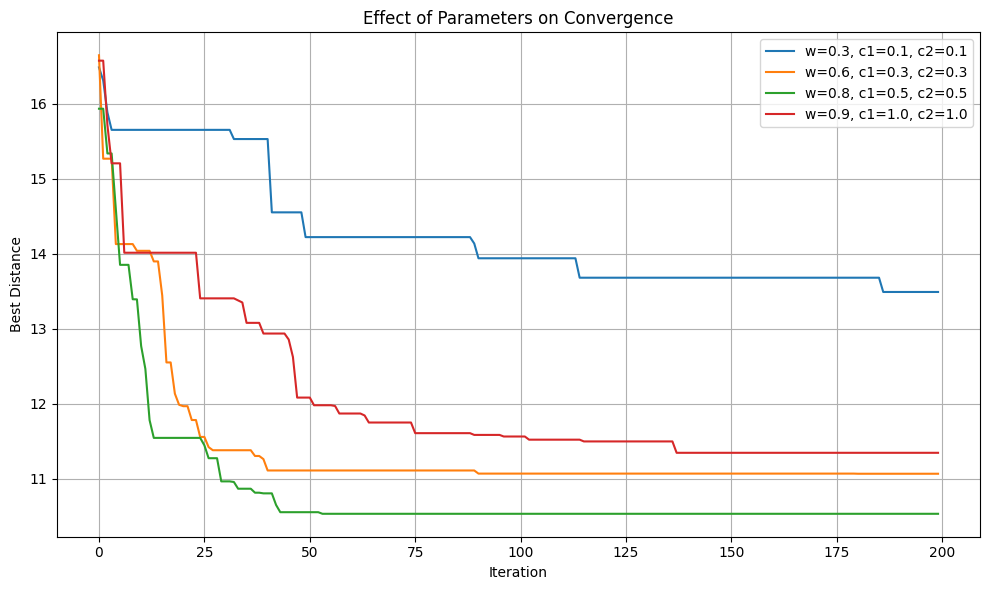

In [8]:
param_sets = [
    (0.3, 0.1, 0.1),
    (0.6, 0.3, 0.3),
    (0.8, 0.5, 0.5),
    (0.9, 1.0, 1.0)
]

plt.figure(figsize=(10, 6))

for w, c1, c2 in param_sets:
    pso = PSO(func=tsp_distance, n_dim=n, pop=100, max_iter=200, lb=[0]*n, ub=[1]*n, w=w, c1=c1, c2=c2)
    pso.run()
    plt.plot(pso.gbest_y_hist, label=f"w={w}, c1={c1}, c2={c2}")

plt.title("Effect of Parameters on Convergence")
plt.xlabel("Iteration")
plt.ylabel("Best Distance")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



# **Conclusion**

The PSO behavior for the optimization of the Euclidean Traveling Salesman Problem (TSP) is significantly influenced by three major parameters: inertia weight (w), cognitive coefficient (c1), and social coefficient (c2). These influence the exploration-exploitation tradeoff, learning behavior of particles, and convergence dynamics of the swarm.

Experimentally, the results show that a reasonable value of the inertia weight (typically w = 0.6 to 0.8) strikes a balance between exploration and local exploitation. A very low value of w (e.g., 0.3) causes the swarm to converge too quickly but possibly becomes stuck in local minima, resulting in suboptimal tours. Conversely, a very large value of w (e.g., 0.9) adds to randomness and slows down convergence, possibly resulting in unnecessary extension of the search.

The cognitive coefficient (c1) determines how much a particle trusts its own best experience. A small value like c1 = 0.1 to 0.3 will produce smoother trajectories and controlled self-learning with least chance of early stagnation. Large values will create very individualistic behavior, destroying the overall coherence of the swarm.

The social coefficient (c2) determines the influence of the global best position. In combination with c1 within the range c1 = c2 = 0.3 to 0.5, convergence is improved as particles approach the best-found solution. A too high c2 may cause premature convergence because all particles converge toward a potential suboptimal global best.

In short, the strongest and best-quality solutions for varying TSP sizes (n = 100 to 1000) were obtained using w = 0.6–0.8, c1 = 0.3, and c2 = 0.3 to 0.5. It achieved effective convergence as well as robust solution quality, therefore being the recommended setting for Euclidean TSP with PSO.